# 데이터 전처리 (Data preprocessing)

* 데이터 클린징
* 결손값 처리(Null/Nan처리)
* 이상치 제거


* 데이터 인코딩 (레이블, 원-핫 인코딩)
* 데이터 스케일링


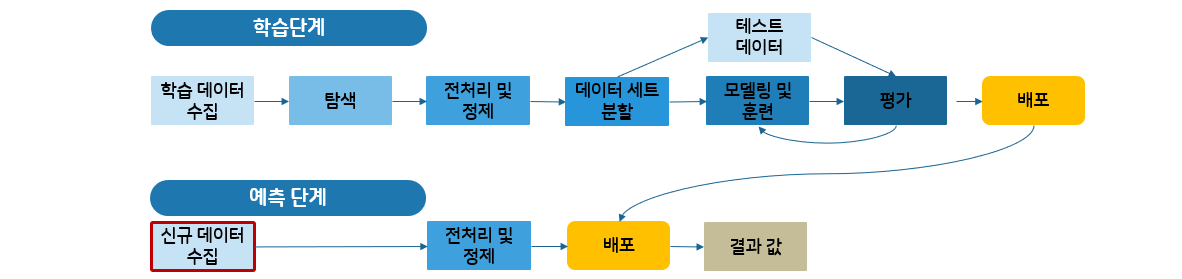

## 머신러닝/딥러닝용 데이터 상태

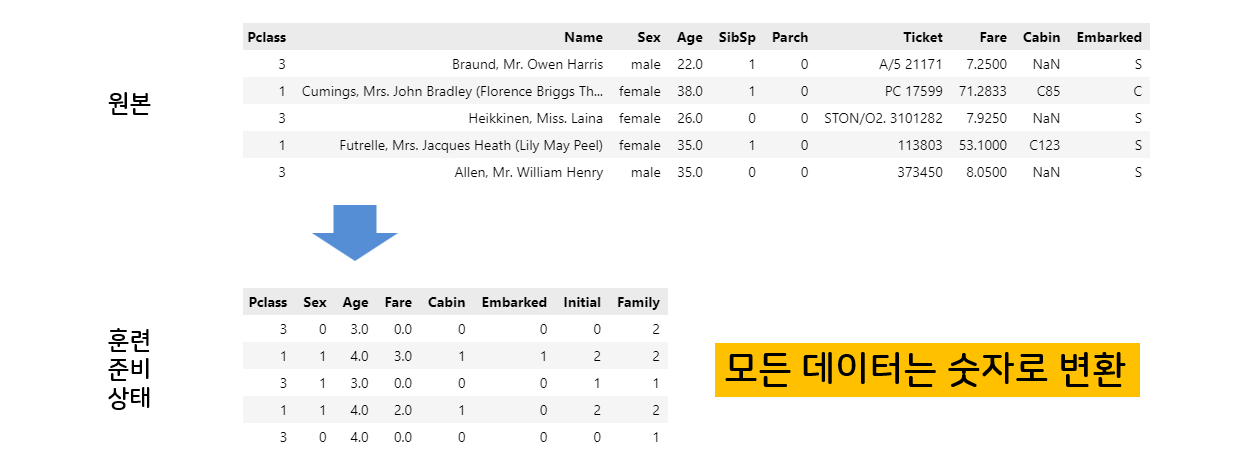

0을 포함 012.. 로 표현되는것은 원핫인코딩의 대상이 될 수 있다.
family 같은 카운팅의 숫자는 데이터를 다루다가 필요시 해야한다.

데이터의 결과 : 생존여부 (생존 : 1 사망 : 0) ==레이블
* 데이터의 목적 : 성별, 나이 등이 결과에 끼친 여부 - > 숫자로 표현해서 머신러닝 가능하게 전처리해야함.

## 데이터 인코딩

* 머신러닝 알고리즘은 문자열 데이터 속성을 입력 받을 수 없습니다.
* 모든 데이터는 **숫자형**으로 표현되어야 합니다.
* 문자형 카테고리형 속성은 모두 숫자값으로 변환 /인코딩 되어야 합니다. 


### 레이블 인코딩(Label encoding)

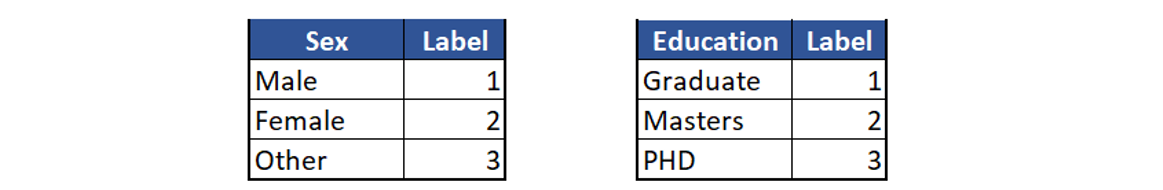

In [2]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)# fit( ) 과 transform( ) 으로 label 인코딩 수행. 
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [3]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [24]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [5]:
#판다스의 원-핫 인코딩이 사용이 편리하다.
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
df.head()

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기


In [6]:
label_df = df.apply(LabelEncoder().fit_transform)

In [7]:
label_df.head()

,item
0,0
1,1
2,4
3,5
4,3


### 원-핫 인코딩(One-Hot encoding)

* 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 피처에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식입니다. 
* 사이킷런의 원-핫 인코딩은 조금 번잡스럽습니다.
* 판다스의 get_dummies() 함수를 사용하는 것이 편합니다.


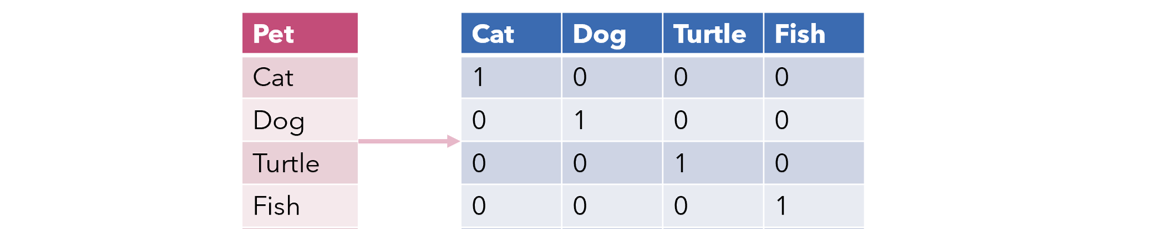

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)
print('2차원 변환값: \n',labels)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

인코딩 변환값: [0 1 4 5 3 3 2 2]
2차원 변환값: 
 [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [5]:
#판다스의 원-핫 인코딩이 사용이 편리하다.
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'],
                   '등급':[1,1,2,5,4,2,1,3]})
df

,item,등급
0,TV,1
1,냉장고,1
2,전자렌지,2
3,컴퓨터,5
4,선풍기,4
5,선풍기,2
6,믹서,1
7,믹서,3


In [6]:
pd.get_dummies(df)

,등급,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0
2,2,0,0,0,0,1,0
3,5,0,0,0,0,0,1
4,4,0,0,0,1,0,0
5,2,0,0,0,1,0,0
6,1,0,0,1,0,0,0
7,3,0,0,1,0,0,0


In [10]:
df.columns.tolist()

['item', '등급']

In [7]:
df#원본 안변함.

,item,등급
0,TV,1
1,냉장고,1
2,전자렌지,2
3,컴퓨터,5
4,선풍기,4
5,선풍기,2
6,믹서,1
7,믹서,3


In [8]:
onehot_cols = df.columns.tolist()
pd.get_dummies(df,columns=onehot_cols)# featuer 수가 11개로 늘어남. => 학습을 0번행, 1번행 ,3번행순 진행하고 , n행의 featuer간의 관계를 분석,예측 결과를 내린다.

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터,등급_1,등급_2,등급_3,등급_4,등급_5
0,1,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,1,0,0,0
6,0,0,1,0,0,0,1,0,0,0,0
7,0,0,1,0,0,0,0,0,1,0,0


## 피처 스케일링

* 모델이 입력 피처의 스케일링(값 범위)에 민감하다면, 피처를 적절히 스케일링(숫자의 범위를 동일하게 만들어준다?) 해 주어야 한다.
* 이걸 피처 스케일링, 혹은 피처 정규화(normalizataion)이라고 부른다.


* 표준화(Standardization): 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환합니다.
* 정규화(Nomalization): 서로 다른 피처의 크기를 통일하기 위해 크기를 변환합니다.  

### StandardScaler()

* 평균이 0이고, 분산이 1인 정규 분포의 형태로 변환합니다. 
* 0을 중심으로 좌우로 적절히 데이터를 배치합니다. 

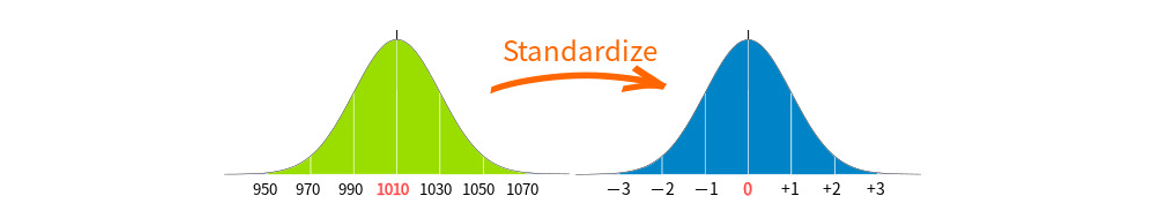

In [11]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())
# 5.84333 5에 근접하는 값들. 3.05733 3에 근접하는 값들 등.

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
    
#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

#-1.690315e-15 --> . 0 이 15번 --> 0에 근접하다 말할 수 있다.
# 5,3,등 근사값이 들쭉날쭉 -> 0에 근접하는 값들로 변경함.

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler()

* Normalization
* 제일 작은 값을 0, 제일 큰 값을 1로 변환합니다. 
* 흩어진 데이터 분포를 0과 1사이에 모으려고 할 때 사용합니다. 

In [25]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 주의사항 (매우중요)
 > 내가 테스트할 데이터도 1과 0 이 들어가야한다?

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [19]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [19]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()  

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [20]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))# [0.  0.2 0.4 0.6 0.8 1. ] 자체적으로 5단위로 나뉨 (잘못됨.)


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [21]:
type(test_array)

numpy.ndarray

In [ ]:
scaler = MinMaxScaler()#변환함. 0과10사이
scaler.fit(train_array)# 훈련데이터를 기준으로 fit함.
train_scaled = scaler.transform(train_array)# 0과1사이로 축약함. 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


<div class="alert alert-block">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">기억하세요</font><br>
Scale 변환을 할 때는 반드시 테스트 데이터는 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
</div>  